In [1]:
%run setup.ipynb

In [2]:
df_h12 = phase1_selection.hstats_windowed
df_h12.head(10)

AOM       BFM       BFS       CMS  GAS       GNS  \
chrom start  stop                                                       
2L    1      20000   NaN       NaN       NaN       NaN  NaN       NaN   
      20001  40000   NaN       NaN       NaN       NaN  NaN       NaN   
      40001  60000   NaN       NaN       NaN       NaN  NaN       NaN   
      60001  80000   NaN       NaN       NaN       NaN  NaN       NaN   
      80001  100000  NaN       NaN       NaN       NaN  NaN       NaN   
      100001 120000  NaN       NaN       NaN       NaN  NaN       NaN   
      120001 140000  NaN       NaN       NaN       NaN  NaN       NaN   
      140001 160000  NaN       NaN       NaN       NaN  NaN       NaN   
      160001 180000  NaN  0.431632  0.769395  0.093488  NaN  0.817898   
      180001 200000  NaN  0.481516  0.769242  0.106883  NaN  0.846514   

                          GWA       UGS  
chrom start  stop                        
2L    1      20000        NaN       NaN  
      20001  40000        NaN       NaN  
      40001  60000        NaN       NaN  
      60001  80000        NaN       NaN  
      80001  100000       NaN       NaN  
      100001 120000       NaN       NaN  
      120001 140000       NaN       NaN  
      140001 160000       NaN       NaN  
      160001 180000  0.049386  0.706240  
      180001 200000  0.049386  0.706146

In [3]:
xpehh_raw = phase1_selection.xpehh_raw
xpehh_raw

Group(/, 5)
  groups: 5; 2L, 2R, 3L, 3R, X
  store: DirectoryStore

In [80]:
grp = xpehh_raw['2R/BFSvsGWA']
grp

Group(/2R/BFSvsGWA, 3)
  arrays: 3; POS, XPEHH, XPEHH_zscore
  store: DirectoryStore

In [81]:
pos = grp['POS'][:]
score = grp['XPEHH_zscore'][:]

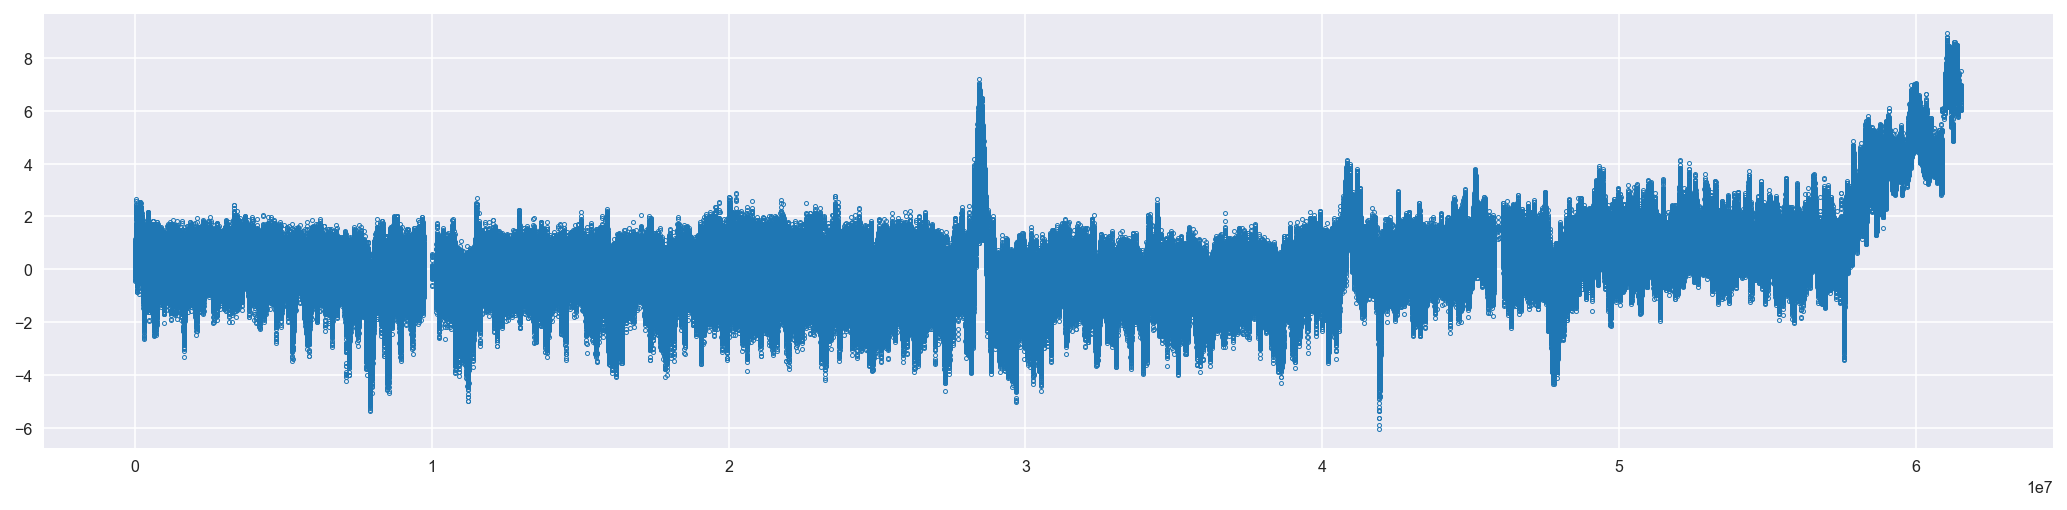

In [55]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(pos, score, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

In [82]:
windows = allel.stats.window.position_windows(pos, size=20000, start=1, stop=len(genome['2R']), step=20000)
windows

array([[       1,    20000],
       [   20001,    40000],
       [   40001,    60000],
       ..., 
       [61500001, 61520000],
       [61520001, 61540000],
       [61540001, 61545105]])

In [83]:
wx = (windows[:, 0] + windows[:, 1]) / 2
wy, _, _ = allel.windowed_statistic(pos, score, statistic=np.nanmax, windows=windows)
# wy = wy.clip(0, None)

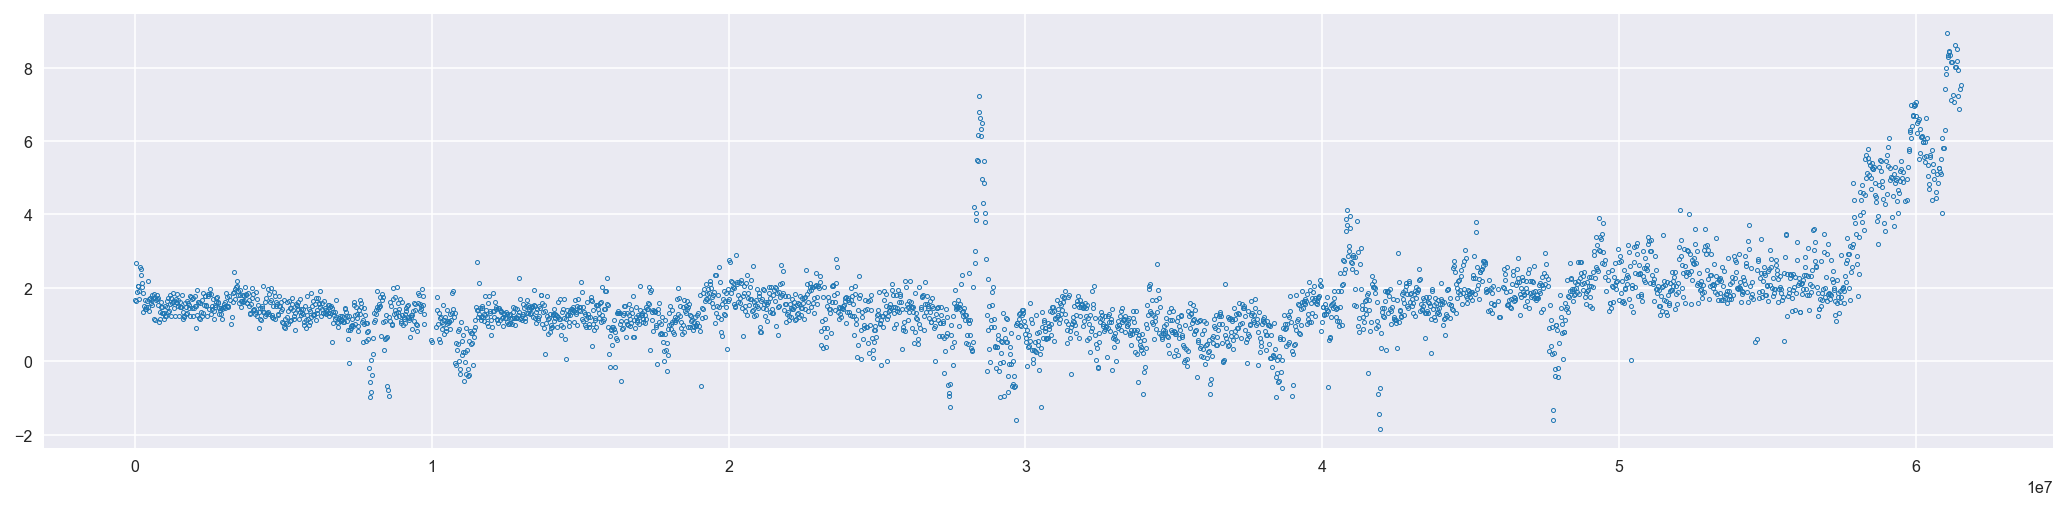

In [84]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

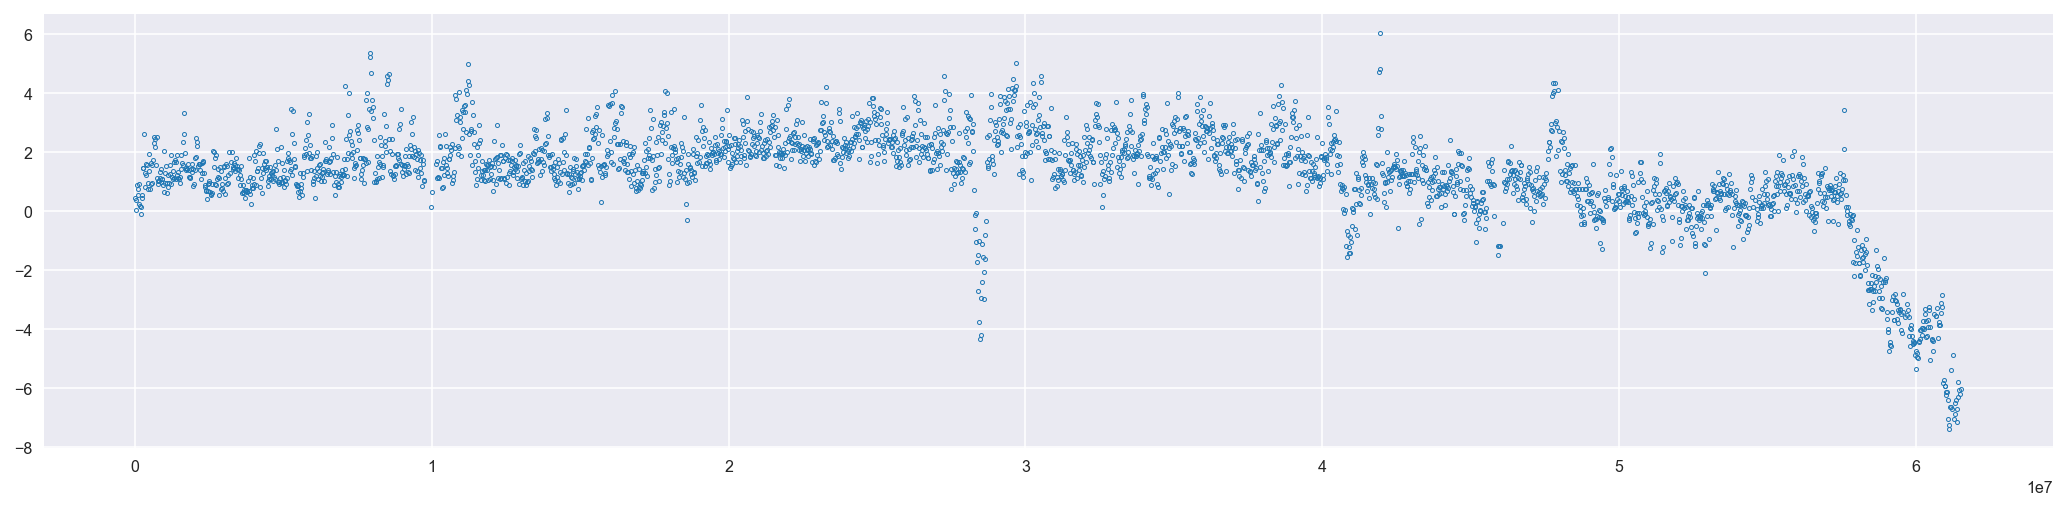

In [85]:
wy2, _, _ = allel.windowed_statistic(pos, score, statistic=np.nanmin, windows=windows)
wy2 = -wy2
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy2, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5)
#ax.set_ylim(-2, 10);

In [89]:
# This fits each flank independently and returns delta AIC as minimum of the two 
# flanks - better at excluding edge effects.
pairexp_fitter = rockies.PairExponentialPeakFitter(
    amplitude=lmfit.Parameter(value=8, vary=True, min=0),
    decay=lmfit.Parameter(value=2e5, vary=True, min=5e4),
    c=lmfit.Parameter(value=2, vary=True, min=-5, max=5),
    cap=lmfit.Parameter(value=20, vary=False)
)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 75
    # variables        = 3
    chi-square         = 45.149
    reduced chi-square = 0.627
    Akaike info crit   = -32.064
    Bayesian info crit = -25.111
[[Variables]]
    amplitude:   8.17340666 +/- 0.864138 (10.57%) (init= 8)
    decay:       1.0225e+05 +/- 1.50e+04 (14.71%) (init= 200000)
    c:           0.88044202 +/- 0.107280 (12.18%) (init= 2)
    cap:         20 (fixed)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, decay)          = -0.731 
    C(decay, c)                  = -0.398 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 75
    # variables        = 3
    chi-square         = 52.375
    reduced chi-square = 0.727
    Akaike info crit   = -20.929
    Bayesian info crit = -13.976
[[Variables]]
    amplitude:   7.67531222 +/- 0.507654 (6.61%) (init= 8)
    decay:       1.8367e+05 +

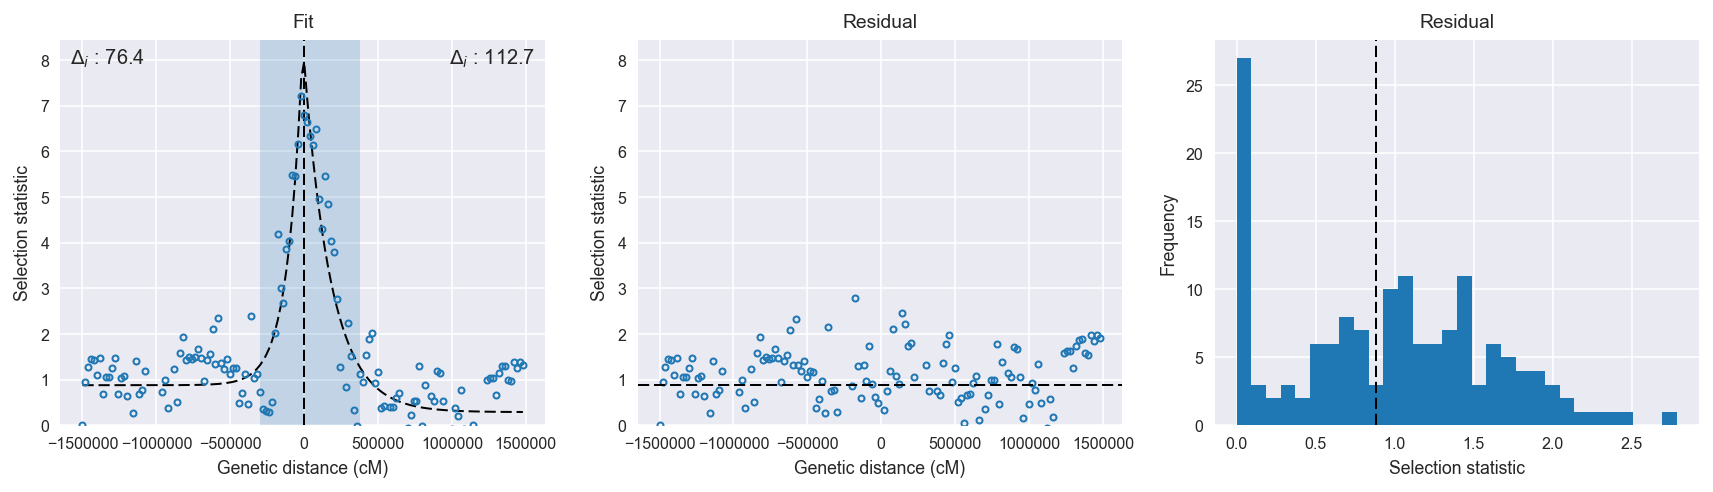

In [90]:
missing = np.isnan(wy)
x, y, center, flank = wx[~missing], wy[~missing], 2.845e7, 1.5e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 43
    # data points      = 89
    # variables        = 4
    chi-square         = 36.553
    reduced chi-square = 0.430
    Akaike info crit   = -71.200
    Bayesian info crit = -61.245
[[Variables]]
    amplitude:   4.14327586 +/- 0        (0.00%) (init= 8)
    decay:       1.2413e+05 +/- 0        (0.00%) (init= 200000)
    c:           0.79291986 +/- 0        (0.00%) (init= 2)
    cap:         20         +/- 0        (0.00%) (init= 20)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 96
    # variables        = 4
    chi-square         = 41.053
    reduced chi-square = 0.446
    Akaike info crit   = -73.550
    Bayesian info crit = -63.293
[[Variables]]
    amplitude:   3.64120253 +/- 0        (0.00%) (init= 8)
    decay:       3.3596e+05 +/- 0        (0.00%) (init= 200000)
    c:           0.29031954 +/- 0        (0.00%) (init= 2)
    cap:         20

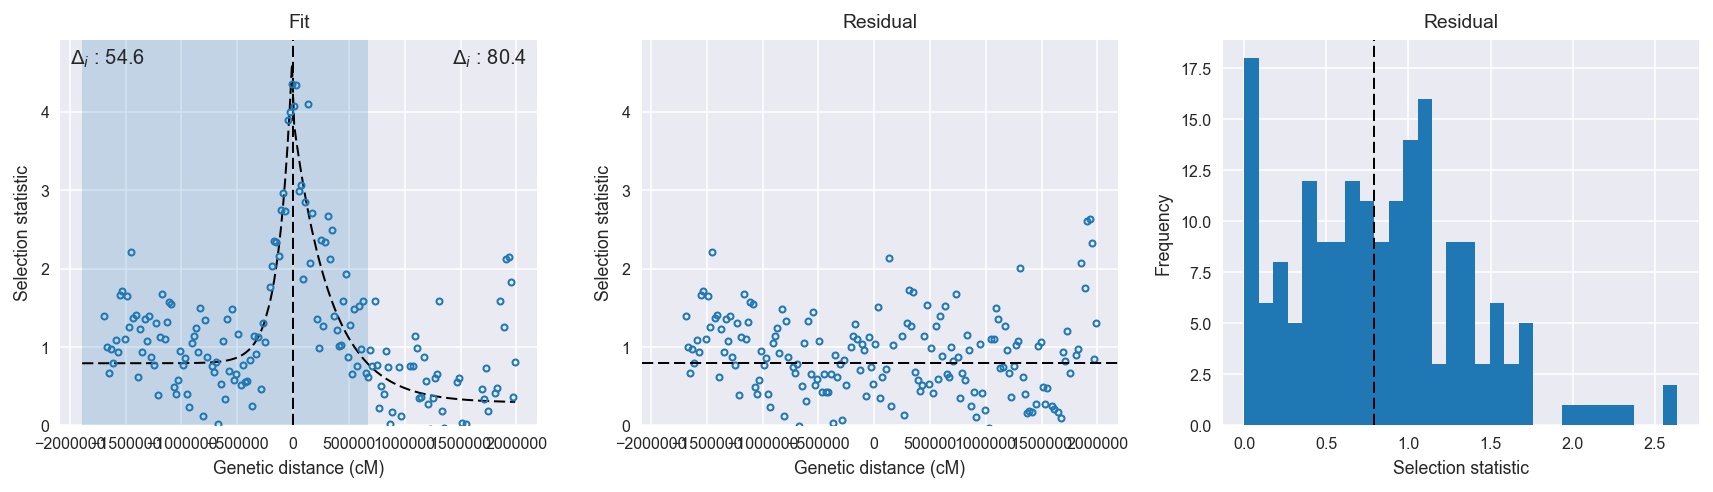

In [62]:
missing = np.isnan(wy2)
x, y, center, flank = wx[~missing], wy2[~missing], 4.78e7, 2e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 73
    # data points      = 108
    # variables        = 4
    chi-square         = 43.859
    reduced chi-square = 0.422
    Akaike info crit   = -89.325
    Bayesian info crit = -78.596
[[Variables]]
    amplitude:   2.39622241 +/- 0        (0.00%) (init= 8)
    decay:       2.7975e+05 +/- 0        (0.00%) (init= 200000)
    c:           1.65716659 +/- 0        (0.00%) (init= 2)
    cap:         20         +/- 0        (0.00%) (init= 20)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 125
    # variables        = 4
    chi-square         = 32.219
    reduced chi-square = 0.266
    Akaike info crit   = -161.472
    Bayesian info crit = -150.158
[[Variables]]
    amplitude:   3.40344834 +/- 0        (0.00%) (init= 8)
    decay:       1.1402e+05 +/- 0        (0.00%) (init= 200000)
    c:           1.55923926 +/- 0        (0.00%) (init= 2)
    cap:       

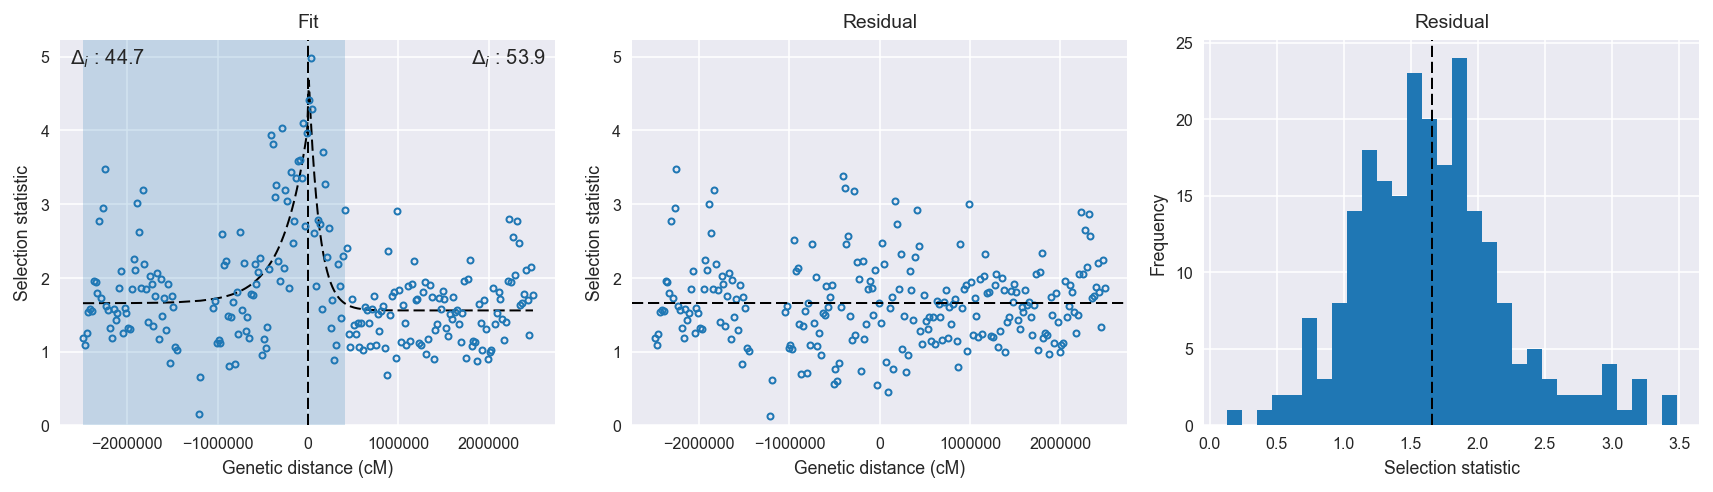

In [63]:
missing = np.isnan(wy2)
x, y, center, flank = wx[~missing], wy2[~missing], 1.12e7, 2.5e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())

In [91]:
grp = xpehh_raw['2L/BFSvsGWA']
grp

Group(/2L/BFSvsGWA, 3)
  arrays: 3; POS, XPEHH, XPEHH_zscore
  store: DirectoryStore

In [92]:
pos = grp['POS'][:]
score = grp['XPEHH_zscore'][:]

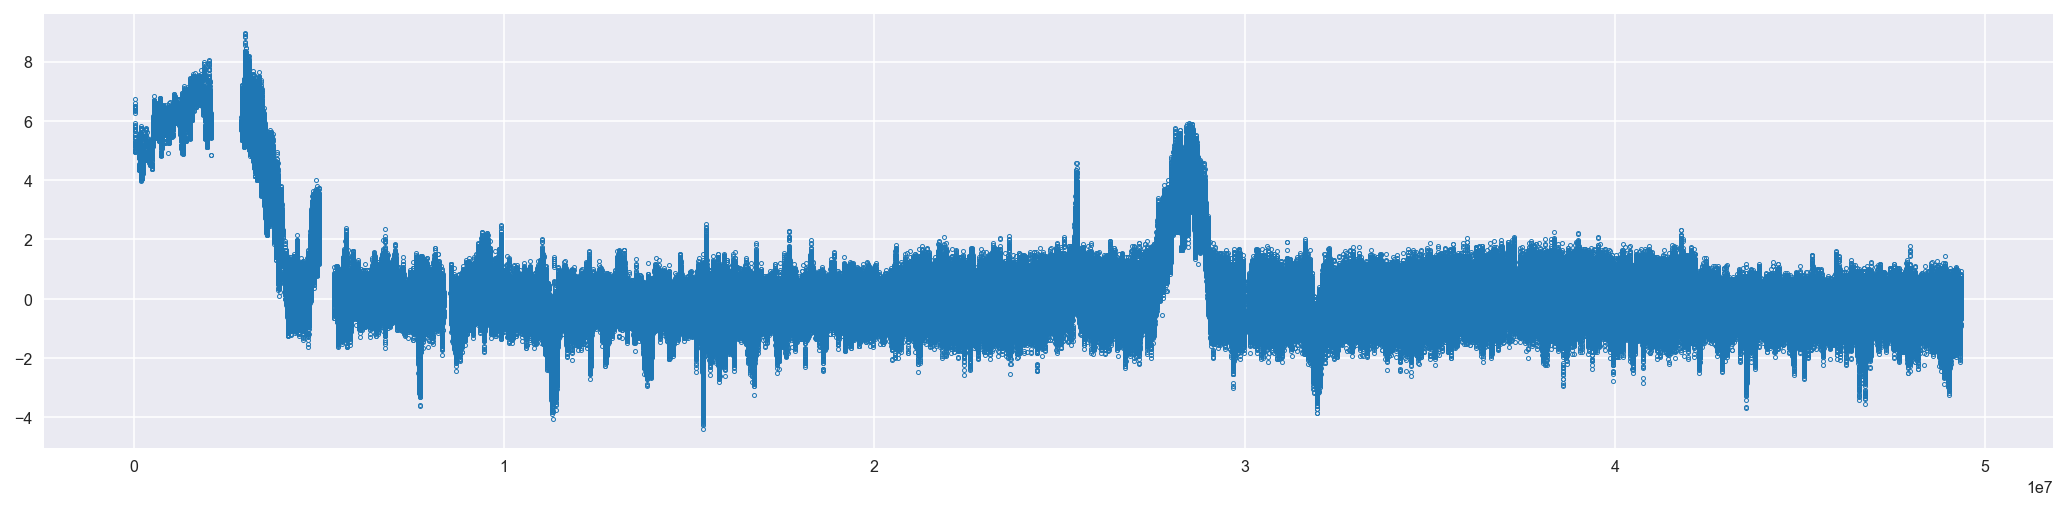

In [66]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(pos, score, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5);

In [93]:
windows = allel.stats.window.position_windows(pos, size=20000, start=1, stop=len(genome['2L']), step=20000)
windows

array([[       1,    20000],
       [   20001,    40000],
       [   40001,    60000],
       ..., 
       [49320001, 49340000],
       [49340001, 49360000],
       [49360001, 49364325]])

In [94]:
wx = (windows[:, 0] + windows[:, 1]) / 2
wy, _, _ = allel.windowed_statistic(pos, score, statistic=np.nanmax, windows=windows)
# wy = wy.clip(0, None)

/home/aliman/src/github/malariagen/agam-selection-atlas/deps/conda/envs/agam-selection-atlas/lib/python3.6/site-packages/allel/stats/window.py:366: RuntimeWarning: All-NaN slice encountered
  s = statistic(wv)


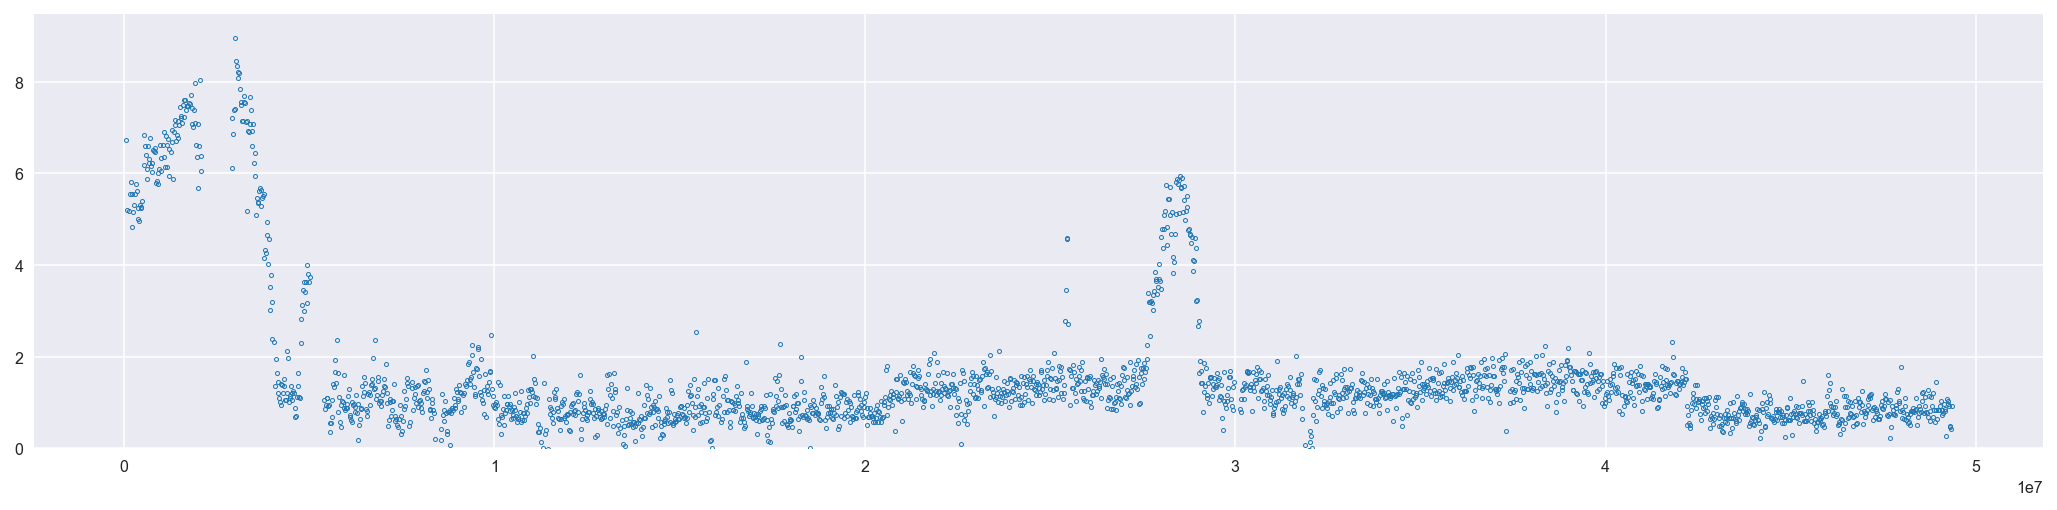

In [95]:
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5)
ax.set_ylim(bottom=0);

/home/aliman/src/github/malariagen/agam-selection-atlas/deps/conda/envs/agam-selection-atlas/lib/python3.6/site-packages/allel/stats/window.py:366: RuntimeWarning: All-NaN axis encountered
  s = statistic(wv)


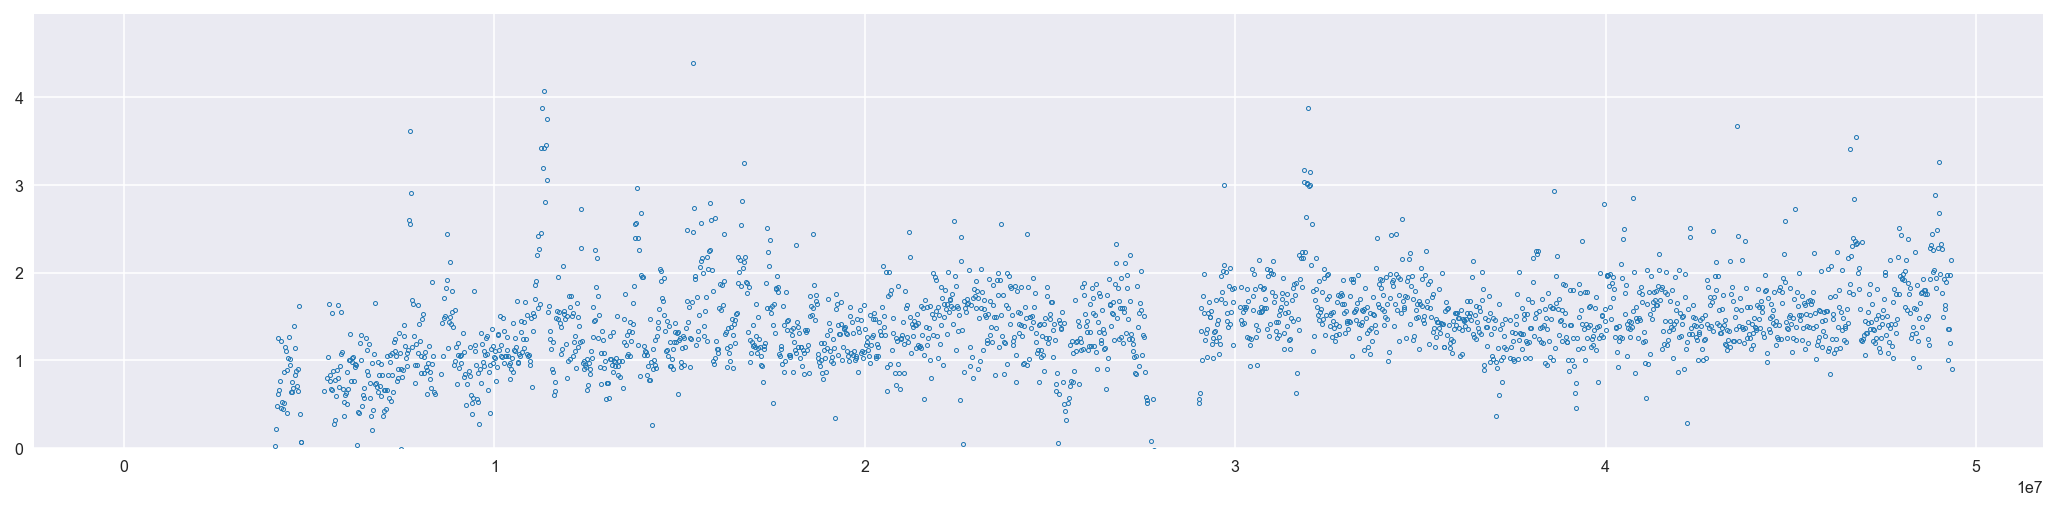

In [96]:
wy2, _, _ = allel.windowed_statistic(pos, score, statistic=np.nanmin, windows=windows)
wy2 = -wy2
fig, ax = plt.subplots(figsize=(18, 4))
ax.plot(wx, wy2, marker='o', linestyle=' ', markersize=2, mfc='none', mew=.5)
ax.set_ylim(bottom=0);

In [99]:
# This fits each flank independently and returns delta AIC as minimum of the two 
# flanks - better at excluding edge effects.
pairexp_fitter = rockies.PairExponentialPeakFitter(
    amplitude=lmfit.Parameter(value=8, vary=True, min=0),
    decay=lmfit.Parameter(value=2e5, vary=True, min=5e4),
    c=lmfit.Parameter(value=2, vary=True, min=-5, max=5),
    cap=lmfit.Parameter(value=5, vary=True)
)

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 81
    # data points      = 150
    # variables        = 4
    chi-square         = 48.902
    reduced chi-square = 0.335
    Akaike info crit   = -160.122
    Bayesian info crit = -148.079
[[Variables]]
    amplitude:   13.0726815 +/- 3.299457 (25.24%) (init= 8)
    decay:       2.7588e+05 +/- 4.00e+04 (14.51%) (init= 200000)
    c:           1.43665871 +/- 0.066016 (4.60%) (init= 2)
    cap:         4.87984957 +/- 0.136411 (2.80%) (init= 5)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, decay)          = -0.961 
    C(decay, c)                  = -0.514 
    C(amplitude, c)              =  0.385 

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 84
    # data points      = 143
    # variables        = 4
    chi-square         = 18.995
    reduced chi-square = 0.137
    Akaike info crit   = -280.673
    Bayesian info crit = -268.821
[[Variables]]
    ampli

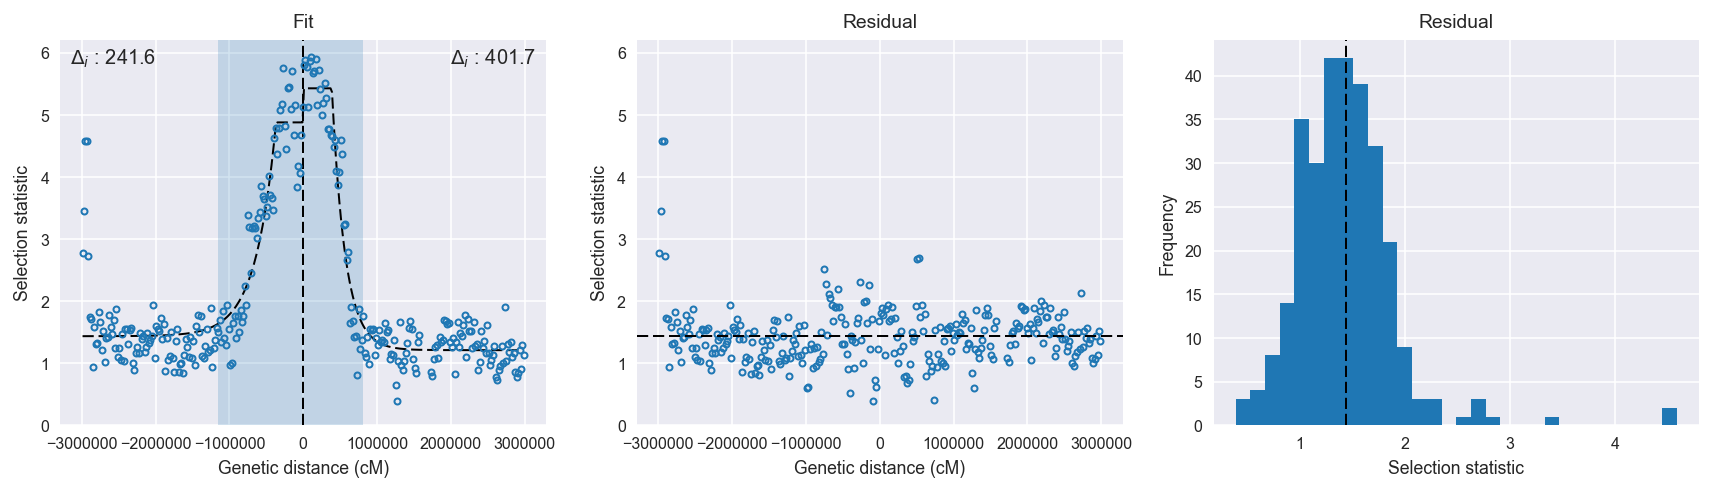

In [100]:
missing = np.isnan(wy)
x, y, center, flank = wx[~missing], wy[~missing], 2.84e7, 3e6
fit = pairexp_fitter.fit(x, y, center, flank)
rockies.plot_peak(fit)
print(fit.peak_result[0].fit_report())
print(fit.peak_result[1].fit_report())
print(fit.null_result[0].fit_report())
print(fit.null_result[1].fit_report())